In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial import Voronoi, voronoi_plot_2d


In [54]:
X, y = make_blobs(n_samples=400, centers=4, random_state=60)

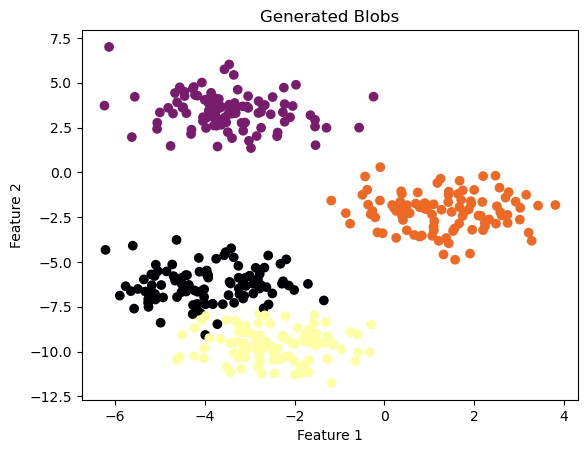

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='inferno')
plt.title("Generated Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4, random_state=60)
y_pred = kmeans.fit_predict(X)


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [57]:
print(y_pred)
print(kmeans.cluster_centers_)

[2 2 0 3 1 0 0 0 2 1 3 3 3 1 1 0 3 0 2 3 1 2 1 0 0 0 3 3 3 3 0 2 2 0 3 3 1
 1 0 2 1 1 2 2 0 0 2 2 3 0 0 3 2 3 2 0 0 2 3 0 3 2 3 3 0 0 3 0 3 2 1 1 2 2
 3 1 0 2 3 2 2 1 1 0 0 2 0 1 0 1 0 3 1 1 3 1 3 2 3 2 1 3 3 1 0 3 1 2 2 1 2
 3 1 1 3 3 2 0 1 1 0 1 3 3 1 2 2 2 0 1 0 1 1 1 3 0 0 0 2 3 1 1 0 0 2 0 2 3
 2 2 1 2 2 0 3 0 0 0 1 2 1 2 3 1 1 1 3 1 1 1 0 2 3 2 1 0 0 0 2 3 1 3 3 3 0
 0 1 3 2 2 2 1 3 3 3 2 0 2 3 3 2 0 3 3 2 2 3 3 2 3 2 3 0 1 0 2 2 2 0 3 2 1
 0 1 1 0 3 0 2 3 1 1 1 1 2 1 3 3 0 0 1 1 0 3 1 2 0 3 3 0 0 1 2 2 3 0 1 0 2
 1 2 3 1 1 3 1 0 3 0 0 3 0 2 3 3 1 0 0 1 0 0 1 1 2 2 3 3 1 3 0 1 2 2 1 3 1
 3 0 0 3 1 0 1 0 3 1 0 0 1 2 1 2 2 3 0 1 2 2 0 1 2 2 2 1 2 3 1 1 2 0 1 0 3
 2 3 2 2 2 0 2 1 0 2 3 2 1 3 3 2 0 2 2 1 0 3 3 3 0 3 3 2 2 0 1 3 2 1 0 3 0
 3 2 3 3 1 3 2 1 2 0 2 3 0 0 1 1 1 1 1 1 0 0 0 2 0 2 3 0 2 1]
[[-3.48826631  3.41123663]
 [-2.44611004 -9.60187156]
 [ 1.29977018 -2.19279221]
 [-3.9574002  -6.29440878]]


In [58]:
new_data = np.array([[3, 4], [0, -3], [-2, 1]])
predictions = kmeans.predict(new_data)
print("Predicted clusters for new data points:", predictions)


Predicted clusters for new data points: [2 2 0]


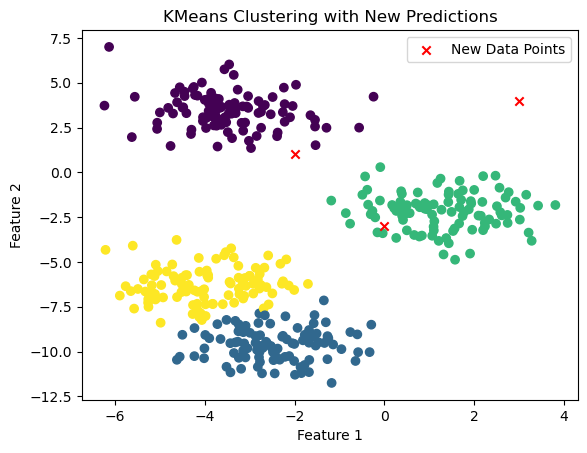

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(new_data[:, 0], new_data[:, 1], c='red', marker='x', label='New Data Points')
plt.title("KMeans Clustering with New Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

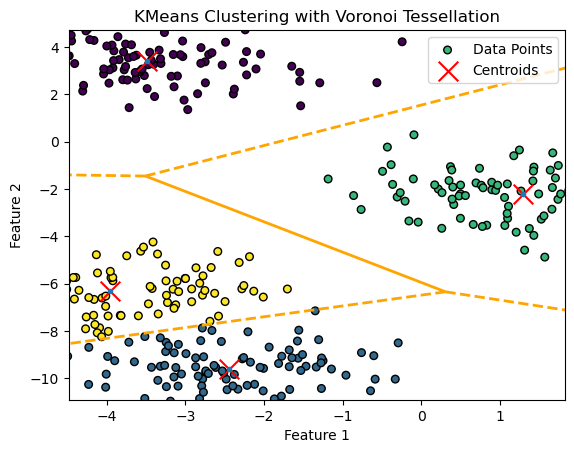

In [60]:
centroids = kmeans.cluster_centers_
vor = Voronoi(centroids)
fig, ax = plt.subplots()

voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2)


ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, edgecolors='k', label='Data Points')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

ax.set_title("KMeans Clustering with Voronoi Tessellation")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.show()

In [61]:
print(kmeans.transform(new_data).round(3))

[[ 6.515 14.652  6.422 12.425]
 [ 7.299  7.04   1.53   5.149]
 [ 2.834 10.611  4.592  7.552]]


In [62]:
kmeans = KMeans( n_init=10, random_state=60)
kmeans.fit(X)
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [63]:
print("Inertia:", kmeans.inertia_)


soft_assignments = kmeans.transform(X)
print("Soft assignment for the first 5 points:\n", soft_assignments[:5])


sil_score = silhouette_score(X, y_pred)
print("Silhouette Score:", sil_score)

Inertia: 500.78076066941696
Soft assignment for the first 5 points:
 [[ 1.13183009  4.52433723  7.07310559  5.92314169  7.72932756  2.34345627
   5.71147175  7.3488804 ]
 [ 1.5559173   7.04236514  7.63039421  8.56261338  9.74986858  1.75278657
   5.92265332  9.69361647]
 [ 6.92863628 10.30951328  1.19409373 10.65752152 14.1796078   8.61373122
   1.42540496 13.20142945]
 [ 7.5276965   1.9264671  11.05787248  1.23295492  3.37780424  7.81486374
  10.53497643  1.69667169]
 [ 9.10453717  4.57627581 14.32153142  5.20006535  0.65302902  8.5649077
  13.45702899  2.41106599]]
Silhouette Score: 0.346842413150181


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

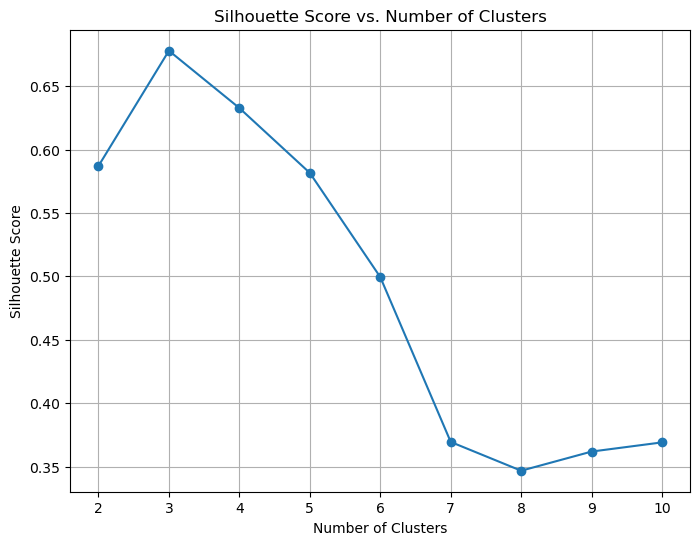

In [64]:
range_n_clusters = list(range(2, 11))
silhouette_avg = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=60)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    silhouette_avg.append(silhouette_score(X, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

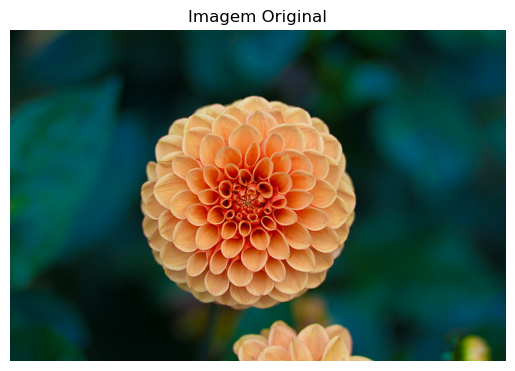

In [65]:
image = load_sample_image("flower.jpg") 
plt.imshow(image)
plt.title("Imagem Original")
plt.axis("off")
plt.show()

image_array = image / 255.0 
image_array = image_array.reshape(-1, 3)

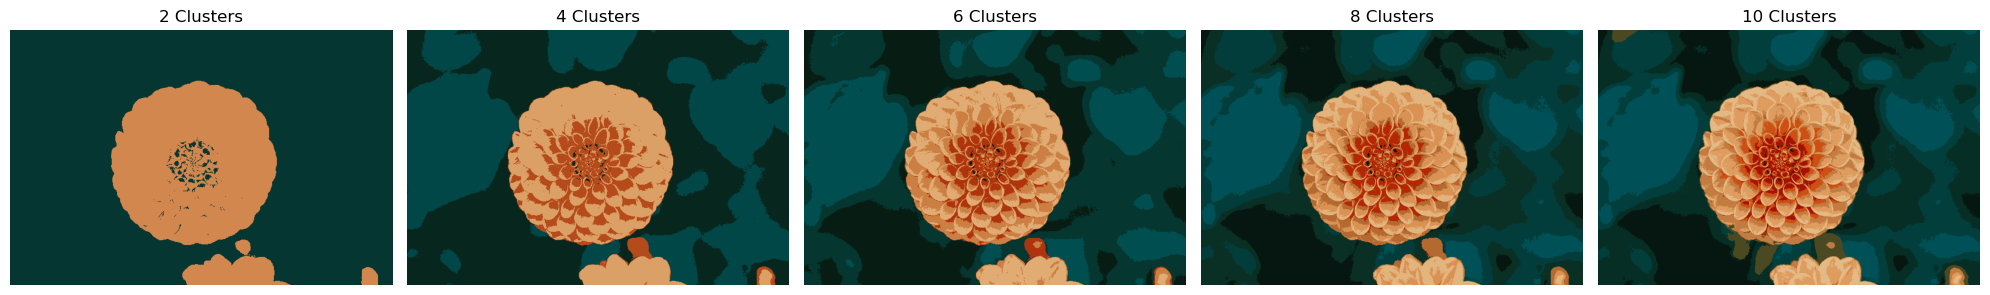

In [66]:
cluster_values = [2, 4, 6, 8, 10]


fig, axes = plt.subplots(1, len(cluster_values), figsize=(20, 5))
for ax, n_clusters in zip(axes, cluster_values):
    kmeans = KMeans(n_clusters=n_clusters, random_state=60)
    kmeans.fit(image_array)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    ax.imshow(segmented_img)
    ax.set_title(f"{n_clusters} Clusters")
    ax.axis("off")

plt.tight_layout()
plt.show()